# Tracking mutation frequencies

In [1]:
%matplotlib inline
%pylab inline
import fwdpy as fp
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import copy

Populating the interactive namespace from numpy and matplotlib


## Run a simulation

In [2]:
nregions = [fp.Region(0,1,1),fp.Region(2,3,1)]
sregions = [fp.ExpS(1,2,1,-0.1),fp.ExpS(1,2,0.01,0.001)]
rregions = [fp.Region(0,3,1)]
rng = fp.GSLrng(201)
popsizes = np.array([1000],dtype=np.uint32)
popsizes=np.tile(popsizes,10000)
#Initialize a vector with 1 population of size N = 1,000
pops=fp.popvec(1,1000)
#Record mutation frequencies every generation
rawTraj=fp.evolve_regions_track(rng,pops,popsizes[0:],0.001,0.001,0.001,nregions,sregions,rregions,1)

In [3]:
##Convert the raw trajectort data into a nicer pd.DataFrame
LD=[]
for i in rawTraj[0]:
    I=int(0)
    for j in i[1]:
        x=copy.deepcopy(i[0])
        x['freq']=j
        x['generation']=i[0]['origin']+I
        I+=1
        LD.append(x)
               
traj=pd.DataFrame(LD)

## Group mutation trajectories by position and effect size

#### Max mutation frequencies


In [4]:
mfreq = traj.groupby(['pos','esize']).max().reset_index()
#Print out info for all mutations that hit a frequency of 1 (e.g., fixed)
mfreq[mfreq['freq']==1]

,pos,esize,freq,generation,origin
16467,1.817526,0.001171,1,4587,1547


The only fixation has an 'esize' $> 0$, which means that it was positively selected,

#### Frequency trajectory of fixations 

In [5]:
#Get positions of mutations that hit q = 1
mpos=mfreq[mfreq['freq']==1]['pos']

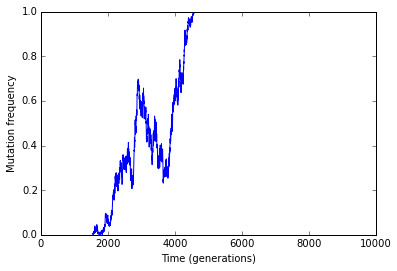

In [6]:
#Frequency trajectories of fixations
fig = plt.figure()
ax = plt.subplot(111)
plt.xlabel("Time (generations)")
plt.ylabel("Mutation frequency")
ax.set_xlim(traj['generation'].min(),traj['generation'].max())
for i in mpos:
    plt.plot(traj[traj['pos']==i]['generation'],traj[traj['pos']==i]['freq'])

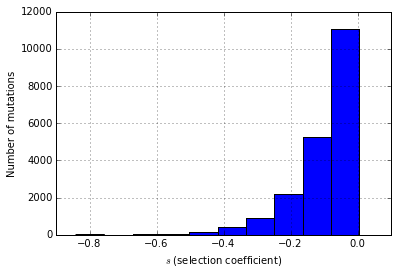

In [7]:
#Let's get histogram of effect sizes for all mutations that did not fix
fig = plt.figure()
ax = plt.subplot(111)
plt.xlabel(r'$s$ (selection coefficient)')
plt.ylabel("Number of mutations")
mfreq[mfreq['freq']<1.0]['esize'].hist()